In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [65]:
print('More than 2 thousand data points were incomplete. 23.93:76.07 (with unknown) and 23.93:76.07 (without unknown)')

More than 2 thousand data points were incomplete. 23.93:76.07 (with unknown) and 23.93:76.07 (without unknown)


In [2]:
data = pd.read_csv('C:\\Users\\user\\Desktop\\Adult\\adult_data.csv',header=0)
data.replace(' ?',np.NaN,inplace=True)

In [3]:
print(data.head(50))

    Age          Workclass  Fnlwgt      Education  Education_num  \
0    39          State-gov   77516      Bachelors             13   
1    50   Self-emp-not-inc   83311      Bachelors             13   
2    38            Private  215646        HS-grad              9   
3    53            Private  234721           11th              7   
4    28            Private  338409      Bachelors             13   
5    37            Private  284582        Masters             14   
6    49            Private  160187            9th              5   
7    52   Self-emp-not-inc  209642        HS-grad              9   
8    31            Private   45781        Masters             14   
9    42            Private  159449      Bachelors             13   
10   37            Private  280464   Some-college             10   
11   30          State-gov  141297      Bachelors             13   
12   23            Private  122272      Bachelors             13   
13   32            Private  205019     Assoc-acd

In [4]:
data = data.dropna()
print(data.head(50))

    Age          Workclass  Fnlwgt      Education  Education_num  \
0    39          State-gov   77516      Bachelors             13   
1    50   Self-emp-not-inc   83311      Bachelors             13   
2    38            Private  215646        HS-grad              9   
3    53            Private  234721           11th              7   
4    28            Private  338409      Bachelors             13   
5    37            Private  284582        Masters             14   
6    49            Private  160187            9th              5   
7    52   Self-emp-not-inc  209642        HS-grad              9   
8    31            Private   45781        Masters             14   
9    42            Private  159449      Bachelors             13   
10   37            Private  280464   Some-college             10   
11   30          State-gov  141297      Bachelors             13   
12   23            Private  122272      Bachelors             13   
13   32            Private  205019     Assoc-acd

In [5]:
print(data.columns)

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Maritalstatus', 'Occupation', 'Relationship', 'Race', 'Gender',
       'Capitalgain', 'Capitaloss', 'Hoursperweek', 'Native', 'Salary'],
      dtype='object')


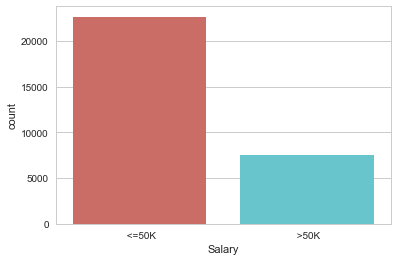

In [8]:
sns.countplot(x='Salary', data=data, palette = 'hls')
plt.show()

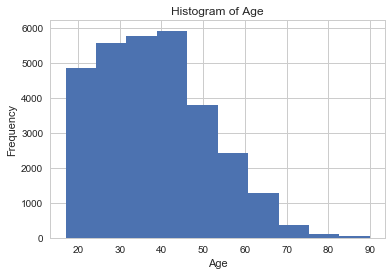

In [9]:
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')
data["Age"].hist()

In [15]:
list1=sorted(data['Age'].unique())
for i in list1:
    print("Age Value",i)
    print(data[data['Age']==int(i)]['Salary'].value_counts())

Age Value 17
 <=50K    328
Name: Salary, dtype: int64
Age Value 18
 <=50K    447
Name: Salary, dtype: int64
Age Value 19
 <=50K    593
 >50K       1
Name: Salary, dtype: int64
Age Value 20
 <=50K    629
Name: Salary, dtype: int64
Age Value 21
 <=50K    618
 >50K       3
Name: Salary, dtype: int64
Age Value 22
 <=50K    662
 >50K      12
Name: Salary, dtype: int64
Age Value 23
 <=50K    812
 >50K      12
Name: Salary, dtype: int64
Age Value 24
 <=50K    722
 >50K      30
Name: Salary, dtype: int64
Age Value 25
 <=50K    746
 >50K      53
Name: Salary, dtype: int64
Age Value 26
 <=50K    684
 >50K      61
Name: Salary, dtype: int64
Age Value 27
 <=50K    714
 >50K      75
Name: Salary, dtype: int64
Age Value 28
 <=50K    692
 >50K     116
Name: Salary, dtype: int64
Age Value 29
 <=50K    643
 >50K     131
Name: Salary, dtype: int64
Age Value 30
 <=50K    646
 >50K     167
Name: Salary, dtype: int64
Age Value 31
 <=50K    674
 >50K     177
Name: Salary, dtype: int64
Age Value 32
 <=50K   

In [17]:
print("Age is a good Parameter for consideration")

Age is a good Parameter for consideration


Text(0,0.5,'Proportion of Salary')

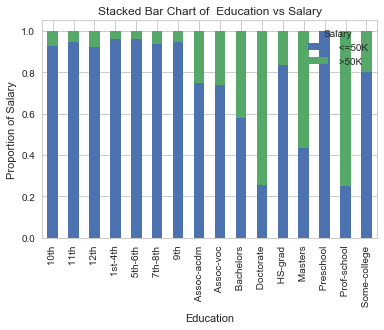

In [18]:
table=pd.crosstab(data['Education'],data['Salary'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of  Education vs Salary')
plt.xlabel('Education')
plt.ylabel('Proportion of Salary')

In [19]:
print("Education a good parameter for consideration")

Education a good parameter for consideration


Text(0,0.5,'Proportion of Salary')

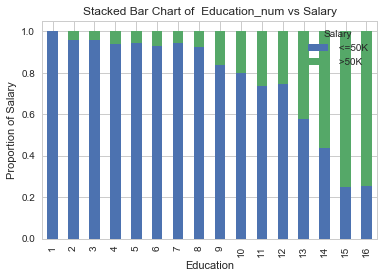

In [20]:
table=pd.crosstab(data['Education_num'],data['Salary'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of  Education_num vs Salary')
plt.xlabel('Education')
plt.ylabel('Proportion of Salary')

Text(0,0.5,'Proportion of Salary')

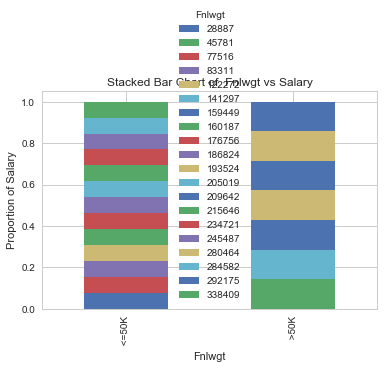

In [21]:
table=pd.crosstab(data['Salary'].head(20),data['Fnlwgt'].head(20))
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of  Fnlwgt vs Salary')
plt.xlabel('Fnlwgt')
plt.ylabel('Proportion of Salary')

Text(0,0.5,'Proportion of Salary')

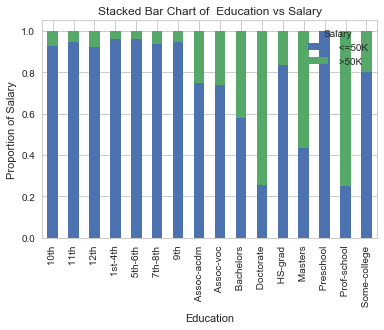

In [22]:
table=pd.crosstab(data['Education'],data['Salary'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of  Education vs Salary')
plt.xlabel('Education')
plt.ylabel('Proportion of Salary')

Text(0,0.5,'Proportion of Salary')

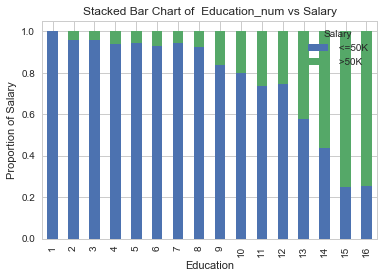

In [23]:
table=pd.crosstab(data['Education_num'],data['Salary'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of  Education_num vs Salary')
plt.xlabel('Education')
plt.ylabel('Proportion of Salary')

Text(0,0.5,'Proportion of Salary')

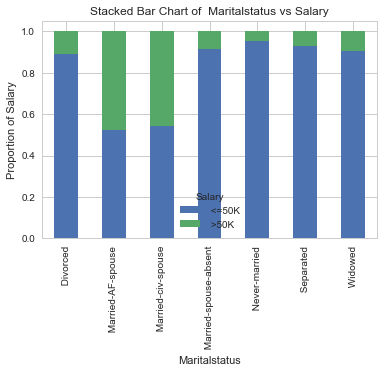

In [24]:
table=pd.crosstab(data['Maritalstatus'],data['Salary'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of  Maritalstatus vs Salary')
plt.xlabel('Maritalstatus')
plt.ylabel('Proportion of Salary')

Text(0,0.5,'Proportion of Salary')

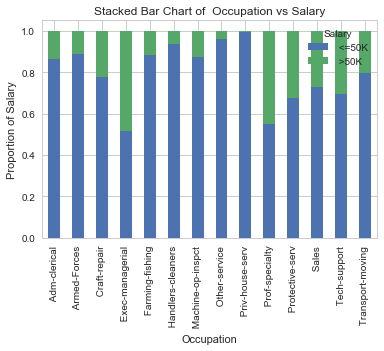

In [25]:
table=pd.crosstab(data['Occupation'],data['Salary'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of  Occupation vs Salary')
plt.xlabel('Occupation')
plt.ylabel('Proportion of Salary')

Text(0,0.5,'Proportion of Salary')

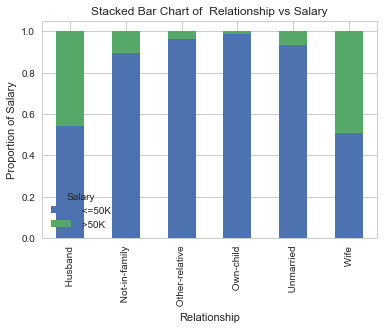

In [26]:
table=pd.crosstab(data['Relationship'],data['Salary'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of  Relationship vs Salary')
plt.xlabel('Relationship')
plt.ylabel('Proportion of Salary')

Text(0,0.5,'Proportion of Salary')

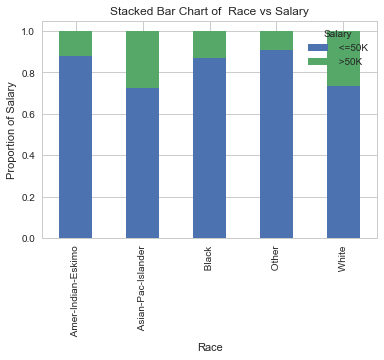

In [27]:
table=pd.crosstab(data['Race'],data['Salary'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of  Race vs Salary')
plt.xlabel('Race')
plt.ylabel('Proportion of Salary')

Text(0,0.5,'Proportion of Salary')

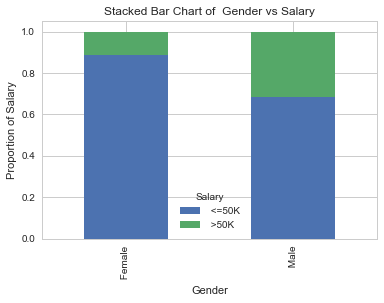

In [28]:
table=pd.crosstab(data['Gender'],data['Salary'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of  Gender vs Salary')
plt.xlabel('Gender')
plt.ylabel('Proportion of Salary')

Text(0,0.5,'Proportion of Salary')

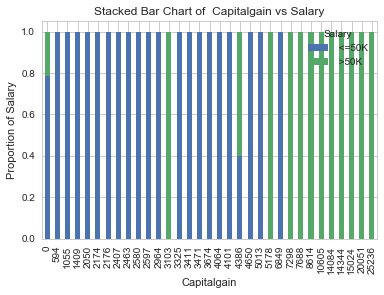

In [32]:
table=pd.crosstab(data['Capitalgain'].head(1000),data['Salary'].head(1000))
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of  Capitalgain vs Salary')
plt.xlabel('Capitalgain')
plt.ylabel('Proportion of Salary')

Text(0,0.5,'Proportion of Salary')

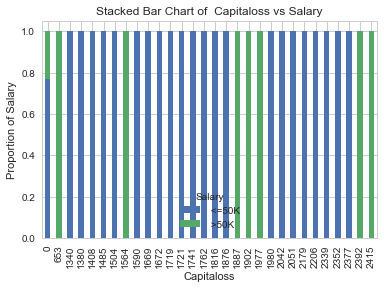

In [33]:
table=pd.crosstab(data['Capitaloss'].head(1000),data['Salary'].head(1000))
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of  Capitaloss vs Salary')
plt.xlabel('Capitaloss')
plt.ylabel('Proportion of Salary')

Text(0,0.5,'Proportion of Salary')

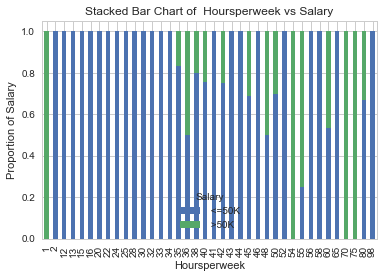

In [36]:
table=pd.crosstab(data['Hoursperweek'].head(300),data['Salary'].head(300))
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of  Hoursperweek vs Salary')
plt.xlabel('Hoursperweek')
plt.ylabel('Proportion of Salary')

Text(0,0.5,'Proportion of Salary')

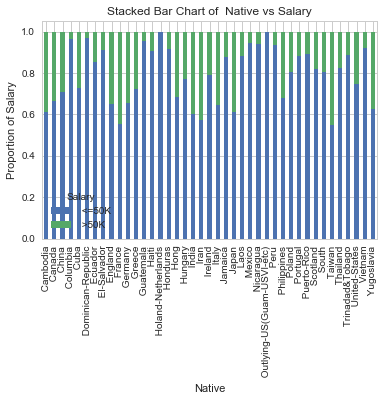

In [37]:
table=pd.crosstab(data['Native'],data['Salary'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of  Native vs Salary')
plt.xlabel('Native')
plt.ylabel('Proportion of Salary')

In [38]:
data[data['Salary']==' <=50K']['Native'].value_counts()

 United-States                 20509
 Mexico                          577
 Philippines                     128
 Puerto-Rico                      97
 El-Salvador                      91
 Germany                          84
 Canada                           71
 Jamaica                          70
 Cuba                             67
 Dominican-Republic               65
 Guatemala                        60
 India                            60
 Vietnam                          59
 South                            57
 England                          56
 Columbia                         54
 China                            48
 Poland                           45
 Italy                            44
 Haiti                            38
 Japan                            36
 Nicaragua                        31
 Portugal                         30
 Peru                             28
 Iran                             24
 Ecuador                          23
 Taiwan                           23
 

In [39]:
data[data['Salary']==' >50K']['Native'].value_counts()

 United-States         6995
 Philippines             60
 Germany                 44
 India                   40
 Canada                  36
 Mexico                  33
 England                 30
 Cuba                    25
 Italy                   24
 Japan                   23
 China                   20
 Taiwan                  19
 Iran                    18
 South                   14
 Puerto-Rico             12
 France                  12
 Poland                  11
 Jamaica                 10
 El-Salvador              9
 Greece                   8
 Cambodia                 7
 Yugoslavia               6
 Hong                     6
 Vietnam                  5
 Ireland                  5
 Ecuador                  4
 Haiti                    4
 Portugal                 4
 Guatemala                3
 Thailand                 3
 Hungary                  3
 Nicaragua                2
 Columbia                 2
 Dominican-Republic       2
 Laos                     2
 Trinadad&Tobago    

In [40]:
X=data[['Age','Workclass','Education','Education_num','Occupation','Hoursperweek']]

In [41]:
cat_vars=['Workclass','Occupation','Education']
for i in cat_vars:
    cat_list = 'var'+'_'+i
    cat_list = pd.get_dummies(X[i],prefix=i)
    x1= X.join(cat_list)
    X=x1

In [42]:
to_keep = [i for i in X.columns if i not in cat_vars]
X_Final = X[to_keep]
Y=data["Salary"]
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
logistic = LogisticRegression()
rfe = RFE(logistic,24)
rfe.fit(X_Final,Y)
print(rfe.support_)
print(rfe.ranking_)
selected_columns =[]
for i in range(len(rfe.support_)):
    if(rfe.support_[i] == True):
        selected_columns.append(to_keep[i])
 
X_Report = X_Final[selected_columns]  

[False  True False False  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True False  True False False False
 False  True  True False False False  True  True False False  True False
  True  True  True False]
[14  1 16  4  1  1  1  1  1  1  1  1  9  1  1  1  1  1  1 11  1 15 10 17
  3  1  1 12  6  7  1  1  8 13  1  5  1  1  1  2]


In [43]:
selected_columns =[]
for i in range(len(rfe.support_)):
    if(rfe.support_[i] == True):
        selected_columns.append(to_keep[i])
 
X_Report = X_Final[selected_columns]       

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_Report, Y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
    
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.78


In [46]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.785


In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)   

[[6267  497]
 [1523  762]]


In [61]:
print("No. of Features\t\tAccuracy(LogReg)\tAccuracy(CroVal)\tConfusion Matrix")
print("17\t\t\t77%\t\t\t77.5%\t\t\t[6512,252]\n\t\t\t\t\t\t\t\t\t[1842,443]")
print()
print("21, 22\t\t\t77%\t\t\t78%\t\t\t[6456,308]\n\t\t\t\t\t\t\t\t\t[1750,535]")
print()
print("23,24\t\t\t78%\t\t\t78.5%\t\t\t[6267,497]\n\t\t\t\t\t\t\t\t\t[1523,762]")

No. of Features		Accuracy(LogReg)	Accuracy(CroVal)	Confusion Matrix
17			77%			77.5%			[6512,252]
									[1842,443]

21, 22			77%			78%			[6456,308]
									[1750,535]

23,24			78%			78.5%			[6267,497]
									[1523,762]


In [62]:
print("Native feature was affecting our accuracy. It reduced the accuracy by 2%")

Native feature was affecting our accuracy. It reduced the accuracy by 2%
